In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('customers.csv')

In [3]:
data.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0     835 Frank Tunnel\r\nWrightmouth, MI 82180-9605            Violet   
1   4547 Archer Common\r\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\r\nCobbborough,...            Bisque   
3  1414 David Throughway\r\nPort Jason, OH 22070-...       SaddleBrown   
4  14023 Rodriguez Passage\r\nPort Jacobville, PR...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [4]:
data.shape

(500, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
data.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

# Exploratory Data Analysis

In [8]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

<AxesSubplot: xlabel='Time on Website', ylabel='Count'>

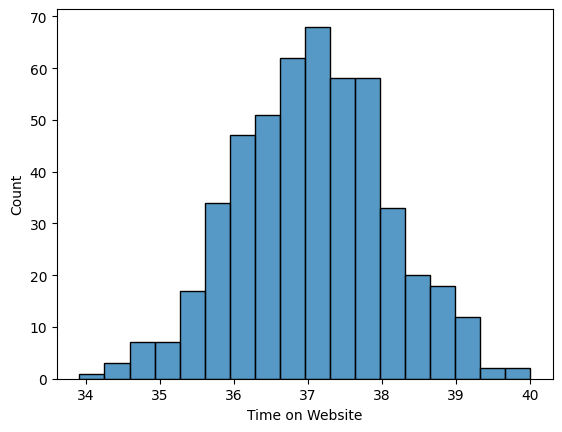

In [9]:
sns.histplot(x='Time on Website',data=data)

<AxesSubplot: xlabel='Time on App', ylabel='Count'>

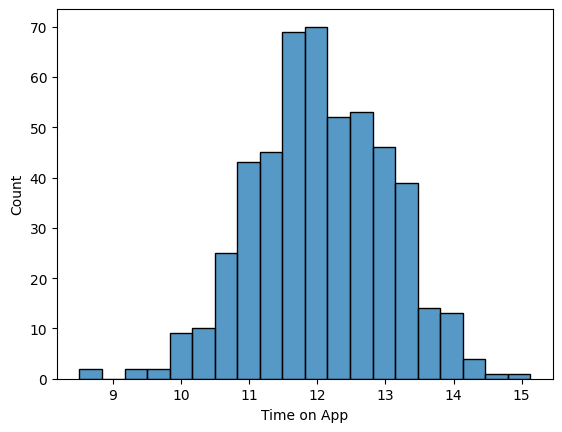

In [10]:
sns.histplot(x='Time on App',data=data)

## Bivariate Analysis

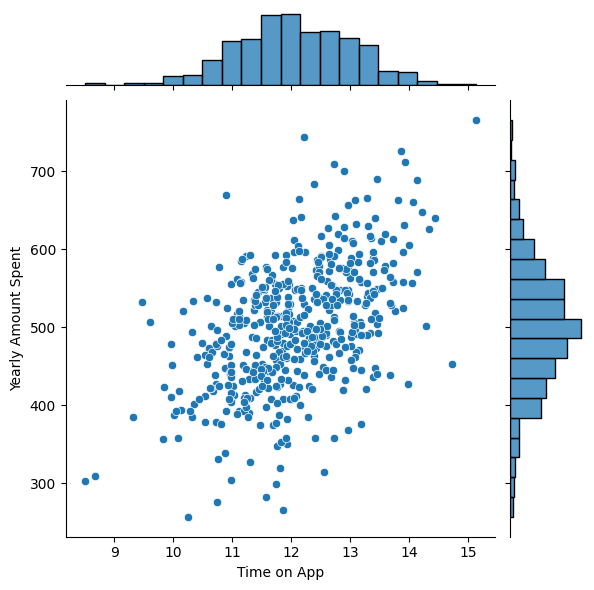

In [12]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=data)

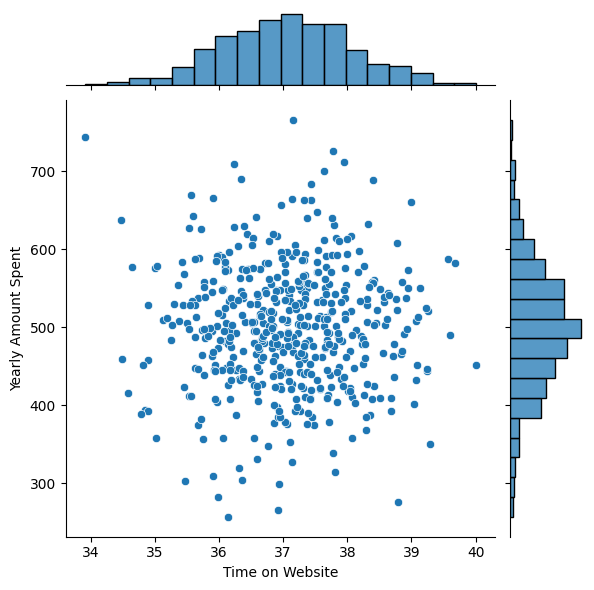

In [13]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=data)

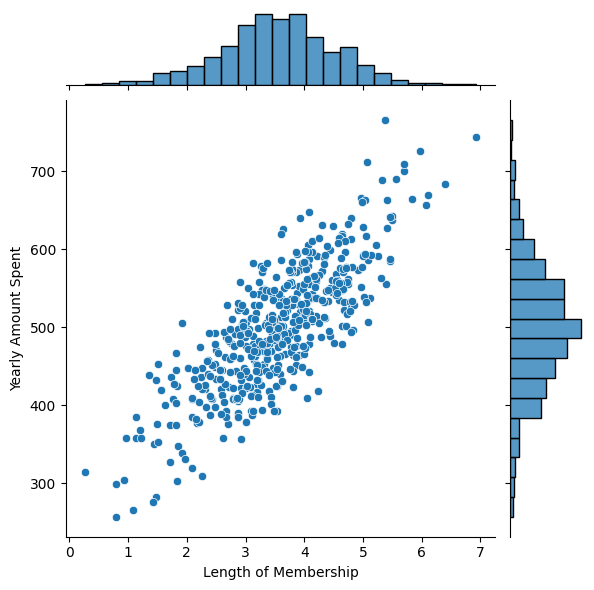

In [14]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=data)

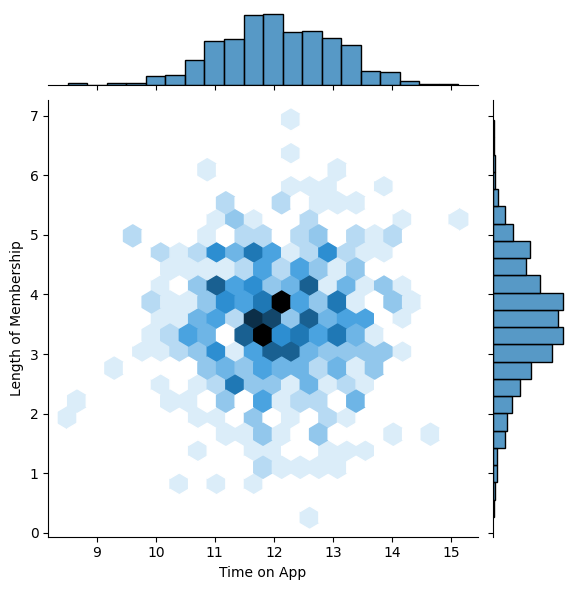

In [15]:
sns.jointplot(x='Time on App', y='Length of Membership', data=data,kind='hex')

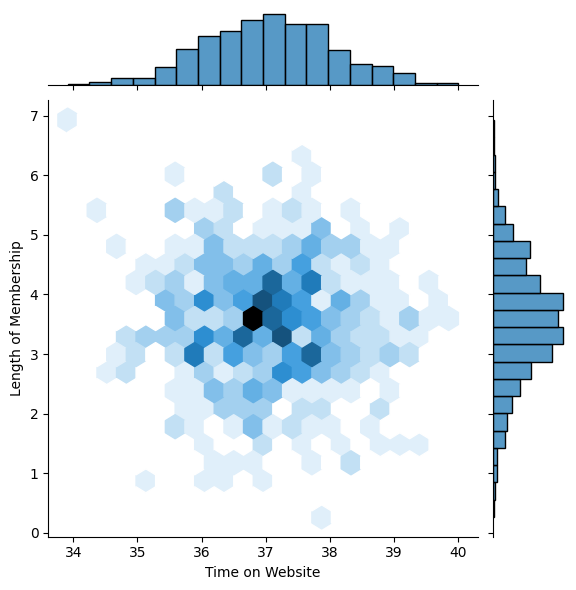

In [16]:
sns.jointplot(x='Time on Website', y='Length of Membership', data=data,kind='hex')

## Multivariate Analysis

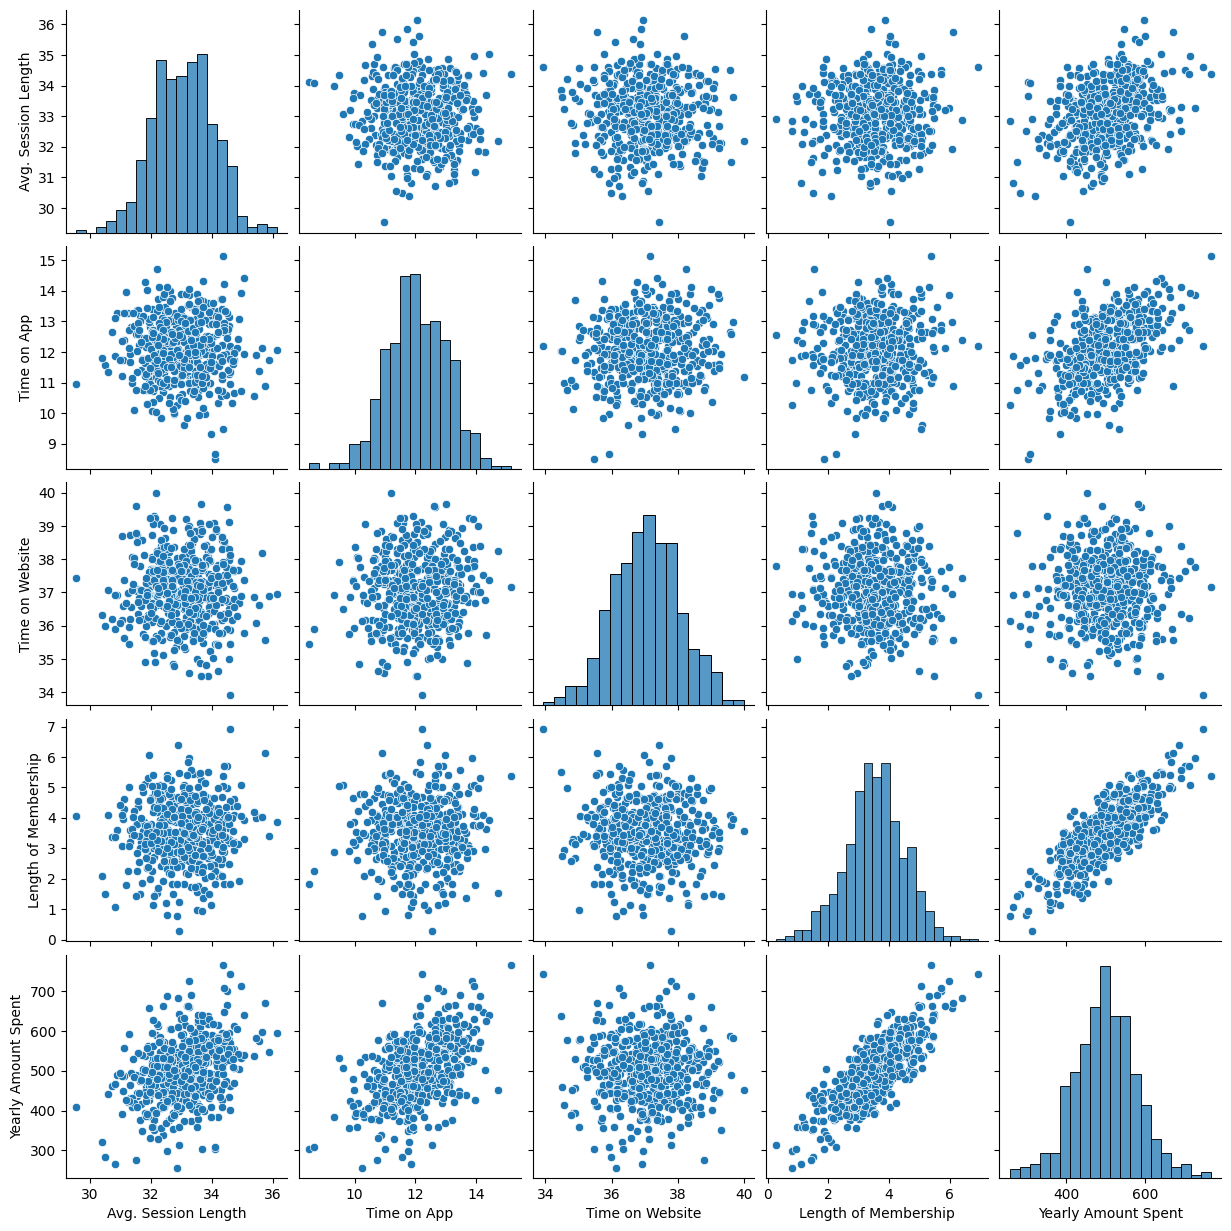

In [17]:
sns.pairplot(data=data)

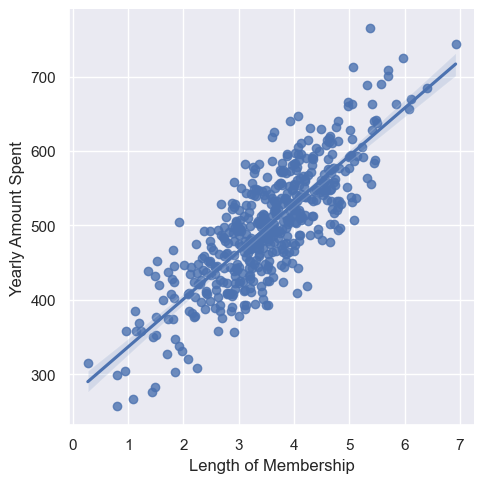

In [18]:
sns.set(color_codes=True)
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',data=data)

In [20]:
X = data[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [22]:
y= data['Yearly Amount Spent']

# Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Modeling 

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [27]:
predictions = model.predict(X_test)

In [32]:
print(model.coef_)

[25.98154972 38.59015875  0.19040528 61.27909654]


In [33]:
predictions = model.predict(X_test)

Text(0.5, 0, 'Y test')

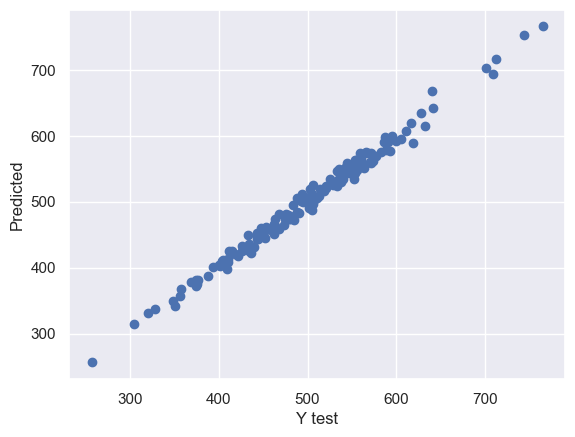

In [35]:
plt.scatter(y_test, predictions)
plt.ylabel('Predicted')
plt.xlabel('Y test')

In [36]:
import sklearn.metrics as metrics

print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

MAE: 7.228148653430826
MSE: 79.81305165097427
RMSE: 8.933815066978624


C:\Users\Aman Rahees\AppData\Local\Temp\ipykernel_2408\3491059997.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions))


<AxesSubplot: xlabel='Yearly Amount Spent', ylabel='Density'>

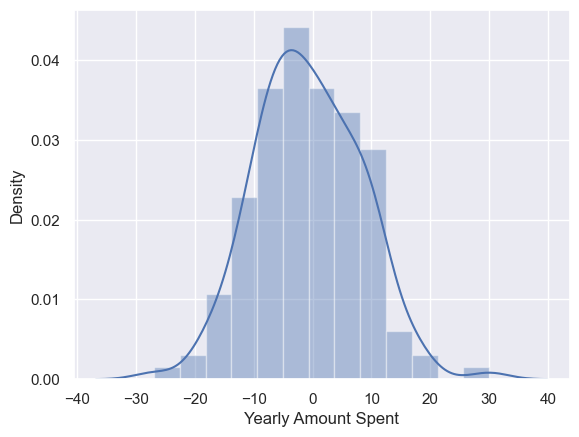

In [37]:
sns.distplot((y_test-predictions))

In [38]:
pd.DataFrame(model.coef_ , X.columns, columns=['Coeffecient'])

Coeffecient
Avg. Session Length     25.981550
Time on App             38.590159
Time on Website          0.190405
Length of Membership    61.279097

# Conclusion

As we can see from the outcome, website traffic brings very little amount for the business, whereas their app is extremely popular, and major source of purchases and sales. It will all come down to business needs. One way to go about it would be to focus their efforts entirely on the app, since it is already generating great business for them. Another way to go about things would be to improve the website, by promoting the website, and improving the website design, user experience, and provide additional discounts on the website, to keep a balance in revenue from both app and website.